In [1]:
import sys

import numpy as np
import pandas as pd

sys.path.insert(0, '../../')
import ccal
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

==================== Computational Cancer Analysis Library ====================
<15:34:47.246486> Checking dependencies ...
<15:34:47.248649> Using the following packages:
<15:34:47.250436> 	matplotlib (v1.5.1)
<15:34:47.250457> 	numpy (v1.10.4)
<15:34:47.250466> 	pandas (v0.18.0)
<15:34:47.250487> 	rpy2 (v2.7.9)
<15:34:47.250495> 	scikit-learn (v0.17.1)
<15:34:47.250502> 	scipy (v0.17.0)
<15:34:47.250509> 	seaborn (v0.7.0)


In [2]:
ref = ccal.support.read_gct('/Users/Kwat/Downloads/CCLE.rpkm.v2.SELECTED_SIGNATURES.v2.gct').ix['KRAS_SALE_Late_Comp_C8_9', :]
features = ccal.support.read_gct('/Users/Kwat/Downloads/ccle_mut_cna.gct')

<15:34:59.077010> Computing features vs. Feature 0 using information_coef metric ...
<15:34:59.077174> Using 100 intersecting columns from features and ref, which have 100 and 100 columns respectively ...
<15:34:59.078865> Computing scores using information_coef metric ...
<15:34:59.078936> 	0/2 ...
<15:34:59.145347> Bootstrapping to get 0.95 confidence interval ...
<15:34:59.273916> Performing permutation test with 2 permutations ...
<15:34:59.392490> Saved the result as /Users/Kwat/Desktop/ola.txt.
<15:34:59.396003> Plotting 1 features vs. reference > 0.95 quantile ...
<15:34:59.396615> Plotting 1 features vs. reference < 0.050000000000000044 quantile ...
<15:34:59.397664> Normalizing continuous features ...
<15:34:59.422210> Normalizing continuous ref ...


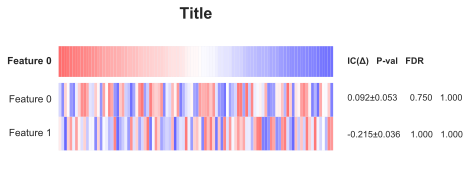

<15:35:02.866994> Saved the figure as /Users/Kwat/Desktop/ola.


In [3]:
nrow, ncol = 2, 100
features = ccal.support.make_random_features(nrow, ncol)
ref = ccal.support.make_random_features(1, ncol)
ccal.analyze.rank_features_against_reference(features, ref, nsampling=2,
                                             nperm=2, title='Title',
                                             output_prefix='/Users/Kwat/Desktop/ola')

In [ ]:
features_cmap, features_min, features_max = setup_heatmap_parameters(features_type)
ref_cmap, ref_min, ref_max = setup_heatmap_parameters(ref_type)

# Normalize
if features_type is 'continuous':
    _print('Normalizing continuous features ...')
    normalize_pandas_object(features)
if ref_type is 'continuous':
    _print('Normalizing continuous ref ...')
    ref = (ref - ref.mean()) / ref.std()
    normalize_pandas_object(ref)
    
fig = plt.figure(figsize=(min(math.pow(features.shape[1], 0.9), 7), math.pow(features.shape[0], 0.9)))

heatmap_ncol = 10
gridspec=plt.GridSpec(features.shape[0] + 1, heatmap_ncol + 1)

# Plot ref, ref label, and title, 
ref_ax = plt.subplot(gridspec.new_subplotspec((0, 0), colspan=heatmap_ncol))
sns.heatmap(pd.DataFrame(ref).T, vmin=ref_min, vmax=ref_max, cmap=ref_cmap, xticklabels=False, cbar=False)
plt.setp(ref_ax.get_yticklabels(), rotation=0)
plt.setp(ref_ax.get_yticklabels(), weight='bold')

if title:
    ref_ax.text(features.shape[1] / 2, 1.9, title, horizontalalignment='center', size=title_size, weight='bold')

if ref_type in ('binary', 'categorical'):
    # Add binary or categorical ref labels
    boundaries = [0]
    prev_v = ref.iloc[0]
    for i, v in enumerate(ref.iloc[1:]):
        if prev_v != v:
            boundaries.append(i + 1)
        prev_v = v
    boundaries.append(features.shape[1])
    label_horizontal_positions = []
    prev_b = 0
    for b in boundaries[1:]:
        label_horizontal_positions.append(b - (b - prev_b) / 2)
        prev_b = b
    # TODO: implement get_unique_in_order
    unique_ref_labels = np.unique(ref.values)[::-1]
    for i, pos in enumerate(label_horizontal_positions):
        ref_ax.text(pos, 1.19, unique_ref_labels[i], horizontalalignment='center', weight='bold')

# Plot features
features_ax = plt.subplot(gridspec.new_subplotspec((1, 0), rowspan=features.shape[0], colspan=heatmap_ncol))
sns.heatmap(features, vmin=features_min, vmax=features_max, cmap=features_cmap, xticklabels=plot_colname, cbar=False)
plt.setp(features_ax.get_yticklabels(), rotation=0)

# Plot annotations
annotation_header_ax = plt.subplot(gridspec.new_subplotspec((0, heatmap_ncol)))
annotation_header_ax.set_axis_off()
a = '\t'.join(annotations.columns).expandtabs()
# a = '      IC               P-val    FDR'
annotation_header_ax.text(0, 0.5, a, horizontalalignment='left', verticalalignment='center', size=annotation_label_size, weight='bold')
for i, (idx, s) in enumerate(annotations.iterrows()):
    ax = plt.subplot(gridspec.new_subplotspec((1 + i, heatmap_ncol)))
    ax.set_axis_off()
    a = '\t'.join(s.tolist()).expandtabs()
    ax.text(0, 0.5, a, horizontalalignment='left', verticalalignment='center', size=annotation_label_size)

fig.subplots_adjust(left=0.15, right=0.7)
plt.show(fig)

if filename_prefix:
    filename = filename_prefix
    fig.savefig(filename, dpi=900)
    _print('Saved the figure as {}.'.format(filename))

In [ ]:
features_cmap, features_min, features_max = setup_heatmap_parameters(features_type)
ref_cmap, ref_min, ref_max = setup_heatmap_parameters(ref_type)

# Normalize
if features_type is 'continuous':
    _print('Normalizing continuous features ...')
    normalize_pandas_object(features)
if ref_type is 'continuous':
    _print('Normalizing continuous ref ...')
    ref = (ref - ref.mean()) / ref.std()
    normalize_pandas_object(ref)
    
fig = plt.figure(figsize=(min(math.pow(features.shape[1], 0.5), 7), math.pow(features.shape[0], 0.9)))
horizontal_text_margin = features.shape[1] // 2
gridspec=plt.GridSpec(features.shape[0] + 1, features.shape[1] + annotations.shape[1] * horizontal_text_margin)

# Plot ref, ref label, and title, 
ref_ax = plt.subplot(gridspec.new_subplotspec((0, 0), colspan=features.shape[1]))
sns.heatmap(pd.DataFrame(ref).T, vmin=ref_min, vmax=ref_max, cmap=ref_cmap, xticklabels=False, cbar=False)
plt.setp(ref_ax.get_yticklabels(), rotation=0)
plt.setp(ref_ax.get_yticklabels(), weight='bold')

if title:
    ref_ax.text(features.shape[1] / 2, 1.9, title, horizontalalignment='center', size=title_size, weight='bold')

if ref_type in ('binary', 'categorical'):
    # Add binary or categorical ref labels
    boundaries = [0]
    prev_v = ref.iloc[0]
    for i, v in enumerate(ref.iloc[1:]):
        if prev_v != v:
            boundaries.append(i + 1)
        prev_v = v
    boundaries.append(features.shape[1])
    label_horizontal_positions = []
    prev_b = 0
    for b in boundaries[1:]:
        label_horizontal_positions.append(b - (b - prev_b) / 2)
        prev_b = b
    # TODO: implement get_unique_in_order
    unique_ref_labels = np.unique(ref.values)[::-1]
    for i, pos in enumerate(label_horizontal_positions):
        ref_ax.text(pos, 1.19, unique_ref_labels[i], horizontalalignment='center', weight='bold')

# Plot features
features_ax = plt.subplot(gridspec.new_subplotspec((1, 0), rowspan=features.shape[0], colspan=features.shape[1]))
sns.heatmap(features, vmin=features_min, vmax=features_max, cmap=features_cmap, xticklabels=plot_colname, cbar=False)
plt.setp(features_ax.get_yticklabels(), rotation=0)

# Plot annotations
for i, a in enumerate(annotations.columns):
    print(i * horizontal_text_margin)
    ax = plt.subplot(gridspec.new_subplotspec((0, features.shape[1] + i * horizontal_text_margin)))
    ax.set_axis_off()
    ax.text(0, 0.5, a, horizontalalignment='left', verticalalignment='center', size=annotation_label_size)

for i, (idx, s) in enumerate(annotations.iterrows()):
    for j, a in enumerate(s):
        ax = plt.subplot(gridspec.new_subplotspec((1 + i, features.shape[1] + j * horizontal_text_margin)))
        ax.set_axis_off()
        ax.text(0, 0.5, a, horizontalalignment='left', verticalalignment='center', size=annotation_label_size)

fig.subplots_adjust(left=0.15, right=0.7)
plt.show(fig)

if filename_prefix:
    filename = filename_prefix
    fig.savefig(filename, dpi=900)
    _print('Saved the figure as {}.'.format(filename))

In [ ]:
ccal.support.VERBOSE = False
for r in range(1, 500, 100):
    for c in range(1, 500, 100):
        features = ccal.support.make_random_features(r, c)
        ref = ccal.support.make_random_features(1, c)
        ccal.analyze.rank_features_against_reference(features, ref, n_sampling=2,
                                                     n_perm=2, n_features=0, title='Continuous {} x {}'.format(r, c))
        
n_category = 10
for r in range(1, 500, 100):
    for c in range(1, 500, 100):
        features = ccal.support.make_random_features(r, c, n_category=n_category)
        ref = ccal.support.make_random_features(1, c, n_category=n_category)
        ccal.analyze.rank_features_against_reference(features, ref, ref_type='categorical',
                                                     n_sampling=2, n_perm=2, n_features=0, title='Categorical {} x {}'.format(r, c))

n_category = 2
for r in range(1, 500, 100):
    for c in range(1, 500, 100):
        features = ccal.support.make_random_features(r, c, n_category=n_category)
        ref = ccal.support.make_random_features(1, c, n_category=n_category)
        ccal.analyze.rank_features_against_reference(features, ref, ref_type='binary',
                                                     n_sampling=2, n_perm=2, n_features=0, title='Binary {} x {}'.format(r, c))

# Test IC

In [ ]:
x = np.random.random_sample(10)
y = np.random.random_sample(10)
print(ccal.information.information_coefficient(x, y))

x = np.random.random_sample(10)
y = np.random.random_sample(11)
try:
    ccal.information.information_coefficient(x, y)
except ValueError as e:
    print(e)

x = np.random.random_sample(10)
x[1] = None
y = np.random.random_sample(10)
y[2] = None
print(ccal.information.information_coefficient(x, y))

x = np.random.random_sample(10)
x[1] = None
y = np.random.random_sample(10)
y[2] = None
y[6] = None
print(ccal.information.information_coefficient(x, y))

x = np.random.random_sample(10)
x[1] = None
x[3] = None
x[5] = None
y = np.random.random_sample(10)
y[2] = None
y[4] = None
print(ccal.information.information_coefficient(x, y))

x = np.array([12.517, 14.706, np.nan, 14.12, np.nan, np.nan, np.nan, 12.255])
y = np.array([0.98246356, 0.97525171, 0.77744759, 0.64084311, 0.4405853, 0.43827196, 0.12447757, 0.08116039])
print(ccal.information.information_coefficient(x, y))

# Make simulation matrix

In [ ]:
def add_value(df, inVal, outVal):
    # Add value in cluster
    # Set inVal or outVal to be None when not updating it
    
    for i,(n,s) in enumerate(df.iterrows()):
        #print('add_value:',i)
        for j,c in enumerate(s.index):
            if inVal and n==c:
                df.iloc[i,j]=inVal
            if outVal and n!=c:
                df.iloc[i,j]=outVal

def add_noise(df,inMu,inSigma,outMu,outSigma):
    # Add noise
    
    for i,(n,s) in enumerate(df.iterrows()):
        #print('add_noise:',i)
        for j,c in enumerate(s.index):
            if (inMu or inSigma) and n==c:
                df.iloc[i,j]+=random.gauss(inMu,inSigma)
            if (outMu or outSigma) and n!=c:
                df.iloc[i,j]+=random.gauss(outMu,outSigma)

def mix(df,k,mix):
    # Mix cluster values to nonclusters and vice versa
    
    assert k!=0, print('k cannot be 0')
    
    # Get the number of values in a cluster
    n_k_val=len(df.columns)*len(df.index)/k
    #print('n_k_val:',n_k_val)
    
    # Count
    c=0
    while c<mix*n_k_val:
        
        # Pick 1st random index and column
        r_idx0=random.randint(0,len(df.index)-1)
        r_col0=random.randint(0,len(df.columns)-1)

        # If index and column locate inside a cluster
        if df.index[r_idx0]==df.columns[r_col0]:    
            
            # Get cluster value located
            pick0=df.iloc[r_idx0,r_col0]
            
            # Pick 2nd random index and column
            r_idx1=random.randint(0,len(df.index)-1)
            r_col1=random.randint(0,len(df.columns)-1)
            
            # If index and column locate outside a cluster
            if df.index[r_idx1]!=df.columns[r_col1]:    

                # Get non-cluster value located
                pick1=df.iloc[r_idx1,r_col1]

                # Swap
                df.iloc[r_idx0,r_col0]=pick1
                df.iloc[r_idx1,r_col1]=pick0
                
                # Count
                c+=1
                
                #print('Swapped (%s,%s) & (%s,%s)'%(df.index[r_idx0],df.columns[r_col0],df.index[r_idx1],df.columns[r_col1]))

def initialize_simulation_df(df,inVal,inMu,inSigma,outVal,outMu,outSigma,mix):
    # Initialize values in and out of a cluster and add noise
    
    t0=time()
    
    # For each row
    for i,(n,s) in enumerate(df.iterrows()):
        print('initialize_simulation_df:',i)
        
        # For each column
        for j,c in enumerate(s.index):
            r=random.random()
            
            if mix and r<=mix:
                # Mix
                if n==c:
                    # In cluster gets out-value
                    df.iloc[i,j]=outVal
                    if outMu or outSigma:
                        df.iloc[i,j]+=random.gauss(outMu,outSigma)
                else:
                    # Out cluster gets in-value
                    df.iloc[i,j]=inVal
                    if inMu or inSigma:
                        df.iloc[i,j]+=random.gauss(inMu,inSigma) 
            else:
                # No mix
                if n==c:
                    # In cluster gets in-value
                    df.iloc[i,j]=inVal
                    if inMu or inSigma:
                        df.iloc[i,j]+=random.gauss(inMu,inSigma)
                else:
                    # Out cluster gets out-value
                    df.iloc[i,j]=outVal
                    if outMu or outSigma:
                        df.iloc[i,j]+=random.gauss(outMu,outSigma)
    print('initialize_simulation_df: done in %0.3fs.'%(time()-t0))

def plot_mtrx(mtrx):
    # Plot simulation matrix
    
    plt.imshow(mtrx,interpolation='nearest',cmap=plt.cm.ocean)
    plt.colorbar()
    plt.show()
    
def make_mtrx_sample_x_variable_simulation(n_sample,
                                           n_var,
                                           k,
                                           val_in,
                                           val_out,
                                           noise_in_mu=None,
                                           noise_in_sigma=None,
                                           noise_out_mu=None,
                                           noise_out_sigma=None,
                                           noise_mix=None,
                                           prefix_out_f=None,
                                           suffix_out_f=None,
                                           plot=False):
    """
    Make sample x variable matrix
    """
    assert k != 0, 'k cannot be 0'
    assert k <= n_var,'k cannot be greater than n_var'
    
    # Make an empty sample x variable matrix filled with 0
    mtrx_sample_x_var = pd.DataFrame(index=range(n_sample), columns=range(n_var)).fillna(0)

    # Slice dataframe index and column and make lists of dataframe indexes and columns for each index and column slice
    list_index_slice = toolK.slice_list(mtrx_sample_x_var.index, k)
    list_column_slice = toolK.slice_list(mtrx_sample_x_var.columns, k)

    # Make index and column slice x dataframe indexes dictionaries
    dict_index_slice = {}
    for i, l in enumerate(list_index_slice):
        dict_index_slice[i] = l
    dict_column_slice = {}
    for i, l in enumerate(list_column_slice):
        dict_column_slice[i] = l

    # Set dataframe index and column to be index and column slice indices respectively
    index=list(mtrx_sample_x_var.index)
    for i,l in dict_index_slice.items():
        for j in l:
            index[j]=i
    mtrx_sample_x_var.index=index
    columns=list(mtrx_sample_x_var.columns)
    for i,l in dict_column_slice.items():
        for j in l:
            columns[j]=i
    mtrx_sample_x_var.columns=columns

    # Initialize simulation matrix
    initialize_simulation_df(mtrx_sample_x_var,val_in,noise_in_mu,noise_in_sigma,val_out,noise_out_mu,noise_out_sigma,noise_mix)
    
    # Save
    if prefix_out_f:        
        mtrx_sample_x_var.to_csv(prefix_out_f+'_sample_%s_var_%s_k_%s_mix_%s_%s'%(n_sample,n_var,k,noise_mix,suffix_out_f),sep='\t')
    
    # Plot
    if plot:
        plot_mtrx(mtrx_sample_x_var)

# Make simulation matrix

# Set number of samples
list_n_sample = [100, 500, 1000, 5000]
# Set number of variables
list_n_var = [100, 500, 1000, 5000]
# Set values in clusters
val_in = 1
# Set values out of clusters
val_out = 0
# Set Ks
list_k = [1, 2, 3, 4, 5, 6, 10, 15, 20, 25]
# Set the fractions of cluster values to be swapped between clusters and nonclusters
list_noise_mix = [0, 0.05, 0.1, 0.2]
# Set noise in clusters
noise_in_mu = 0
noise_in_sigma = 0.1 * noise_in_mu
# Set noise out of clusters
noise_out_mu = 0
noise_out_sigma = 0.1*noise_out_mu

# Simulate
for sample in list_n_sample:
    print('sample:',sample)
    
    for var in list_n_var:
        print('\tvar:',var)
        
        for k in list_k:
            print('\t\tk:',k)
            
            for noise_mix in list_noise_mix:
                print('\t\t\tnoise_mix:',noise_mix)
                
                make_mtrx_sample_x_variable_simulation(sample,
                                                       var,
                                                       k,
                                                       val_in,
                                                       val_out,
                                                       noise_mix=noise_mix,
                                                       prefix_out_f='/cellar/users/hyeerna/aLL/mtrx_sample_x_var_simulation/test/',
                                                       suffix_out_f='sfx',
                                                       plot=True)